#**Is the incidence of pancreatic cancer in European countries associated with macro-statistical variables of their society?**


Student number: 23124377

Words count: 2198

Code is hosted [here](https://github.com/LaneyGUO/CASA0006/tree/main)<br>
Data is availble [here](https://github.com/LaneyGUO/CASA0006/tree/main/data)

[1 Introduction](#1_Introduction) | [2 Literature review](#2_Literature_review) | [3 Research question](#3_Research_question) | [4 Presentation of data](#4_Presentation_of_data) | [5 Methodology](#5_Methodology) | [6 Results](#6_Results) | [7 Discussion and limitations](#7_Discussion_and_limitations) | [8 Conclusion](#8_Conclusion) | [References](#References)

<a name="1_Introduction"></a>
# 1 Introduction


Because of its insidious and highly fatal nature, pancreatic cancer has been one of the cancers of concern to WHO. Sumg et al.(2021) and several other articles annually estimates of incidence and mortality worldwide for 36 cancers in 185 countries. Are et al. (2016) projected trends in pancreatic cancerincidence2020-2030 based on Geographic Location, Socio-Economic Status and Demographic Shift. All of these show that research on the relationship between cancer and social and urban macro-statistics has been ongoing.

This assessment extracted incidence data from the WHO cancer dataset, screened data from 40 European countries, and selected four indicators, namely, population, Human Development Index(HDI), life expectancy, education and Gross National Income (GNI), to conduct regression to analysis the relationship between macro-statistical variables of societies and incidence of Pancreas in Europe.

<a name="2_Literature_review"></a>
# 2 Literature review


Are et al. (2016) used GLOBOCAN 2012 data grouped by Geographic Location, Socio-Economic Status and Demographic Shift to collate the database's 2015, 2020, 2025, 2030 incidence data for the projected values.

Specific prediction methods are not provided, but valid indicators such as HDI and GNI are provided. So this assessment uses GLOBOCAN 2022 dataset(WHO, 2023), refers to the ideas and indicators of Are et al. (2016) to introduce urban social statistics for the analysis of pancreatic cancer factors in each European country, and refers the regression methods of cancer in Vacek(2003).

In [ ]:
# Loading packages
# This tells python to draw the graphs "inline" - in the notebook
%matplotlib inline
import matplotlib.pyplot as plt
import statsmodels.api as sm
from math import sqrt
from numpy.random import seed
from numpy.random import randn
from numpy import mean
from scipy.stats import sem
import statistics
import seaborn as sns
from IPython.display import display, Math, Latex, display_latex
import plotly.express as px
import pylab
import pandas as pd
import numpy as np
# Make the plots (graphs) a little wider by default
pylab.rcParams['figure.figsize'] = (10., 8.)
sns.set(font_scale=1.5)
sns.set_style("white")

<a name="3_Research_question"></a>
# 3 Research question


Exploring the correlated relationship between the incidence of pancreatic cancer and social macro-statistical variables in European countries.

<a name="4_Presentation_of_data"></a>
# 4 Presentation of data


## 4.1 Data loading and cleaning

- **Import and view the original dataset**

In [ ]:
# Read in datasets and Uniform column naming convention
data = pd.read_csv('https://raw.githubusercontent.com/LaneyGUO/CASA0006/main/data/incidence_countries.csv')
data2 = pd.read_excel('https://github.com/LaneyGUO/CASA0006/raw/main/data/HDR23-24_Statistical_Annex_HDI_Table.xlsx', skiprows=4)

data.columns = [col.replace(' ', '_').lower() for col in data.columns]
data2.columns = [col.replace(' ', '_').lower() for col in data2.columns]

data.head()

,country,region,continent,incidence,population
0,Albania,Europe,Southern Europe,302,2866378
1,Austria,Europe,Western Europe,2159,9066712
2,Belarus,Europe,Eastern Europe,1354,9432804
3,Belgium,Europe,Western Europe,2338,11668276
4,Bosnia and Herzegovina,Europe,Southern Europe,502,3249313


'data' has 5 columns:

1. *country*: country name
2. *region*: WHO regional division - Europe
3. *continent*: part of Europe
4. *incidence*: the number of pancreas incidence in 2022
5. *population*: number of people

In [ ]:
data2.head()

,unnamed:_0,country,human_development_index_(hdi)_,unnamed:_3,life_expectancy_at_birth,unnamed:_5,expected_years_of_schooling,unnamed:_7,mean_years_of_schooling,unnamed:_9,gross_national_income_(gni)_per_capita,unnamed:_11,gni_per_capita_rank_minus_hdi_rank,unnamed:_13,hdi_rank
0,HDI rank,NaN,Value,NaN,(years),NaN,(years),NaN,(years),NaN,(2017 PPP $),NaN,NaN,NaN,NaN
1,NaN,NaN,2022,NaN,2022,NaN,2022,a,2022,a,2022,NaN,2022,b,2021
2,NaN,VERY HIGH HUMAN DEVELOPMENT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,Switzerland,0.967,NaN,84.255,NaN,16.583731,NaN,13.904066,c,69432.78669,NaN,6,NaN,1
4,2,Norway,0.966,NaN,83.393,NaN,18.63846,d,13.062343,c,69189.76165,NaN,6,NaN,2


5 useful columns for this research in 'data2':

1. *country*: country name(Geographical factor)
2. *hdi*: Human development index
3. *life_expectancy_at_birth*: average life expectancy at birth(Lifespan factor)
4. *mean_years_of_schooling*: average years of schooling(education factor)
5. *gross_national_income_(gni)_per_capita*: average income (economic factors)

Since the variables are in two tables, they need to be consolidated. The datasets are merged next.

- **Datasets merging**

In [ ]:
# Only remain 4 columns of data2 - country, life_expectancy_at_birth, mean_years_of_schooling, gross_national_income_(gni)_per_capita
data2 = data2.loc[:, ['country', 'human_development_index_(hdi)_','life_expectancy_at_birth', 'mean_years_of_schooling', 'gross_national_income_(gni)_per_capita']]
data2

,country,human_development_index_(hdi)_,life_expectancy_at_birth,mean_years_of_schooling,gross_national_income_(gni)_per_capita
0,NaN,Value,(years),(years),(2017 PPP $)
1,NaN,2022,2022,2022,2022
2,VERY HIGH HUMAN DEVELOPMENT,NaN,NaN,NaN,NaN
3,Switzerland,0.967,84.255,13.904066,69432.78669
4,Norway,0.966,83.393,13.062343,69189.76165
...,...,...,...,...,...
267,Column 2: UNDESA (2022).,NaN,NaN,NaN,NaN
268,"Column 3: CEDLAS and The World Bank (2023), IC...",NaN,NaN,NaN,NaN
269,"Column 4: Barro and Lee (2018), ICF Macro Demo...",NaN,NaN,NaN,NaN
270,"Column 5: IMF (2023), UNDESA (2023), United Na...",NaN,NaN,NaN,NaN


In [ ]:
# Join two raw datasets as one by Country name
df = pd.merge(data, data2, how='left', on=['country'])
df

,country,region,continent,incidence,population,human_development_index_(hdi)_,life_expectancy_at_birth,mean_years_of_schooling,gross_national_income_(gni)_per_capita
0,Albania,Europe,Southern Europe,302,2866378,0.789,76.833,10.121144,15293.32651
1,Austria,Europe,Western Europe,2159,9066712,0.926,82.412,12.305714,56529.66329
2,Belarus,Europe,Eastern Europe,1354,9432804,0.801,73.246,12.241224,18425.01061
3,Belgium,Europe,Western Europe,2338,11668276,0.942,82.293,12.528578,53644.03854
4,Bosnia and Herzegovina,Europe,Southern Europe,502,3249313,0.779,75.293,10.53632,16571.41275
5,Bulgaria,Europe,Eastern Europe,1280,6844591,0.799,71.528,11.41318,25920.80375
6,Croatia,Europe,Southern Europe,801,4059285,0.878,79.236,12.328718,34323.80663
7,Cyprus,Europe,Southern Europe,215,1223390,0.907,81.889,12.44017,40136.89453
8,Czechia,Europe,Eastern Europe,2479,10736782,0.895,78.129,12.916053,39944.66682
9,Denmark,Europe,Northern Europe,1354,5834952,0.952,81.882,12.96049,62018.95694


- **Check the information of original merged dataset**

In [ ]:
# Get information of data columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 9 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   country                                 40 non-null     object
 1   region                                  40 non-null     object
 2   continent                               40 non-null     object
 3   incidence                               40 non-null     int64 
 4   population                              40 non-null     int64 
 5   human_development_index_(hdi)_          40 non-null     object
 6   life_expectancy_at_birth                40 non-null     object
 7   mean_years_of_schooling                 40 non-null     object
 8   gross_national_income_(gni)_per_capita  40 non-null     object
dtypes: int64(2), object(7)
memory usage: 2.9+ KB


Now, all variables are in one dataframe.

- **Change the data type** of the columns life_expectancy_at_birth, mean_years_of_schooling, and gross_national_income_(gni)_per_capita to float

In [ ]:
# Convert the 'life_expectancy_at_birth' column to float type
df['life_expectancy_at_birth'] = df['life_expectancy_at_birth'].astype(float)

# Convert the 'mean_years_of_schooling' column to float type
df['mean_years_of_schooling'] = df['mean_years_of_schooling'].astype(float)

# Convert the 'gross_national_income_(gni)_per_capita' column to float type
df['gross_national_income_(gni)_per_capita'] = df['gross_national_income_(gni)_per_capita'].astype(float)
# Convert the 'human_development_index_(hdi)_' column to float type
df['human_development_index_(hdi)_'] = df['human_development_index_(hdi)_'].astype(float)

# Modify the column name
df = df.rename(columns={'gross_national_income_(gni)_per_capita': 'gni_per_capita'})
df = df.rename(columns={'human_development_index_(hdi)_': 'hdi'})

- **Check null value**

In [ ]:
# Check for null values in the DataFrame and return values from the 'country' column
countries_with_null = df[df.isnull().any(axis=1)]['country']

# Print the values from the 'country' column for rows containing null values
print(countries_with_null)

Series([], Name: country, dtype: object)


It can be noticed that there are no missing values.

In [ ]:
# Show df
df

,country,region,continent,incidence,population,hdi,life_expectancy_at_birth,mean_years_of_schooling,gni_per_capita
0,Albania,Europe,Southern Europe,302,2866378,0.789,76.833,10.121144,15293.32651
1,Austria,Europe,Western Europe,2159,9066712,0.926,82.412,12.305714,56529.66329
2,Belarus,Europe,Eastern Europe,1354,9432804,0.801,73.246,12.241224,18425.01061
3,Belgium,Europe,Western Europe,2338,11668276,0.942,82.293,12.528578,53644.03854
4,Bosnia and Herzegovina,Europe,Southern Europe,502,3249313,0.779,75.293,10.536320,16571.41275
5,Bulgaria,Europe,Eastern Europe,1280,6844591,0.799,71.528,11.413180,25920.80375
6,Croatia,Europe,Southern Europe,801,4059285,0.878,79.236,12.328718,34323.80663
7,Cyprus,Europe,Southern Europe,215,1223390,0.907,81.889,12.440170,40136.89453
8,Czechia,Europe,Eastern Europe,2479,10736782,0.895,78.129,12.916053,39944.66682
9,Denmark,Europe,Northern Europe,1354,5834952,0.952,81.882,12.960490,62018.95694


In [ ]:
# generate summary statistics, and round everything to 2 decimal degrees
summary = df.describe().round(2)
#.T transposes the table (rows become columns and vice versa)
summary = summary.T
summary

,count,mean,std,min,25%,50%,75%,max
incidence,40.0,3663.82,5705.80,56.00,491.00,1393.50,2706.50,2.186900e+04
population,40.0,18318531.55,29780443.88,345400.00,2516604.25,6339771.50,10969655.50,1.458059e+08
hdi,40.0,0.88,0.06,0.73,0.84,0.90,0.94,9.700000e-01
life_expectancy_at_birth,40.0,78.82,4.65,68.56,75.21,80.80,82.49,8.426000e+01
mean_years_of_schooling,40.0,12.25,1.11,9.58,11.48,12.43,12.97,1.426000e+01
gni_per_capita,40.0,40566.38,18167.57,11416.22,30284.21,39037.95,53905.12,8.746751e+04


The results of this table show that the average life expectancy is about 79, the average length of education is about 12 years, and the average per capita income is 40566.38.

However, it can also be seen in this table that there is a gap in the order of magnitude of population and other values, the effects of which need to be noted in subsequent analyses.

- **Check the original merged dataset information**

In [ ]:
# Get information of data columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   40 non-null     object 
 1   region                    40 non-null     object 
 2   continent                 40 non-null     object 
 3   incidence                 40 non-null     int64  
 4   population                40 non-null     int64  
 5   hdi                       40 non-null     float64
 6   life_expectancy_at_birth  40 non-null     float64
 7   mean_years_of_schooling   40 non-null     float64
 8   gni_per_capita            40 non-null     float64
dtypes: float64(4), int64(2), object(3)
memory usage: 2.9+ KB


'df' has 9 columns of variables, each containing 40 rows of values. All values are of type numeric, except for country, region, and continent data, which are of type object. No further type conversion is required.

## 4.2 Overall data distribution graphs and maps

- **Line charts plotting all variables in different countries**

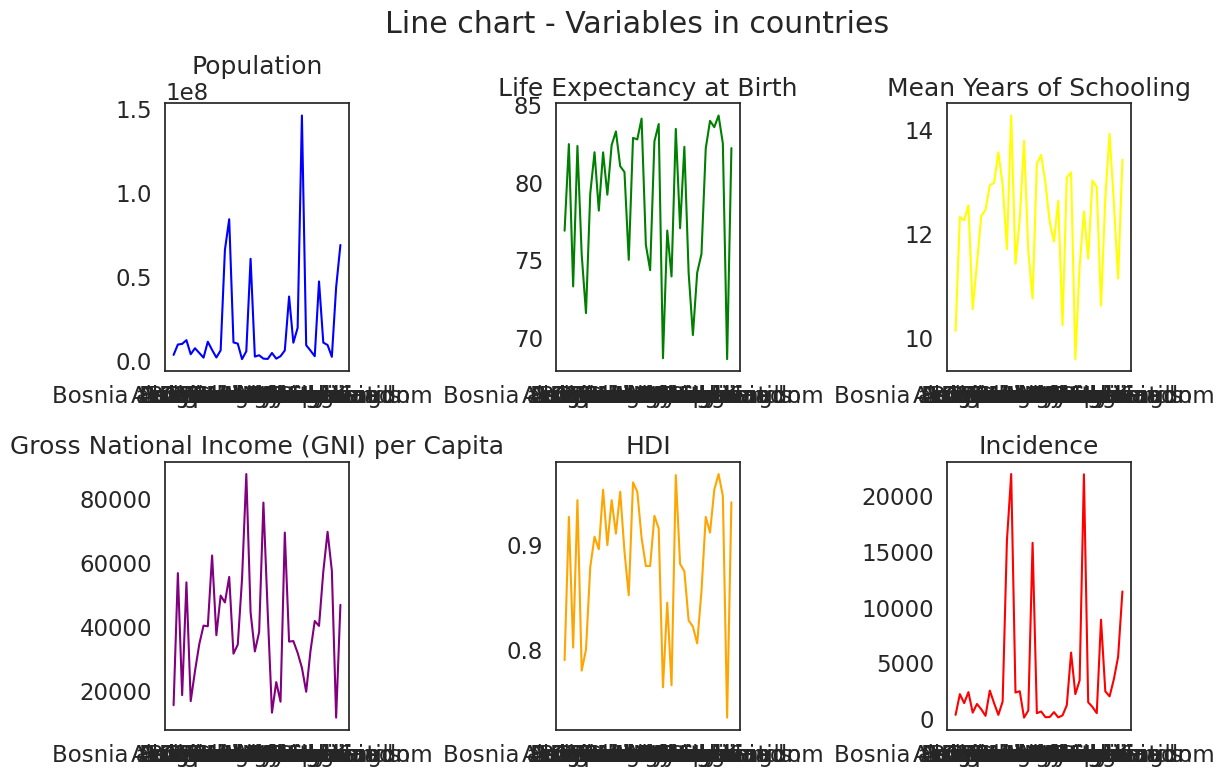

In [ ]:
# Line chart - Variables in countries
import matplotlib.pyplot as plt

x=df['country']
y1=df['population']
y2=df['life_expectancy_at_birth']
y3=df['mean_years_of_schooling']
y4=df['gni_per_capita']
y5=df['hdi']
Y=df['incidence']

# Define a list of colors
colors = ['blue', 'green', 'yellow', 'purple', 'orange', 'red']

# Define the figure and axes
fig, axs = plt.subplots(2, 3, figsize=(12, 8))

# Plot each variable on its own subplot with a different color
axs[0, 0].plot(x, y1, label='population', color=colors[0])
axs[0, 0].set_title('Population')

axs[0, 1].plot(x, y2, label='life_expectancy_at_birth', color=colors[1])
axs[0, 1].set_title('Life Expectancy at Birth')

axs[0, 2].plot(x, y3, label='mean_years_of_schooling', color=colors[2])
axs[0, 2].set_title('Mean Years of Schooling')

axs[1, 0].plot(x, y4, label='gni_per_capita', color=colors[3])
axs[1, 0].set_title('Gross National Income (GNI) per Capita')

axs[1, 1].plot(x, y5, label='hdi', color=colors[4])
axs[1, 1].set_title('HDI')

axs[1, 2].plot(x, Y, label='incidence', color=colors[5])
axs[1, 2].set_title('Incidence')

# Add main title
fig.suptitle('Line chart - Variables in countries')
# Adjust layout and display
plt.tight_layout()
plt.show()

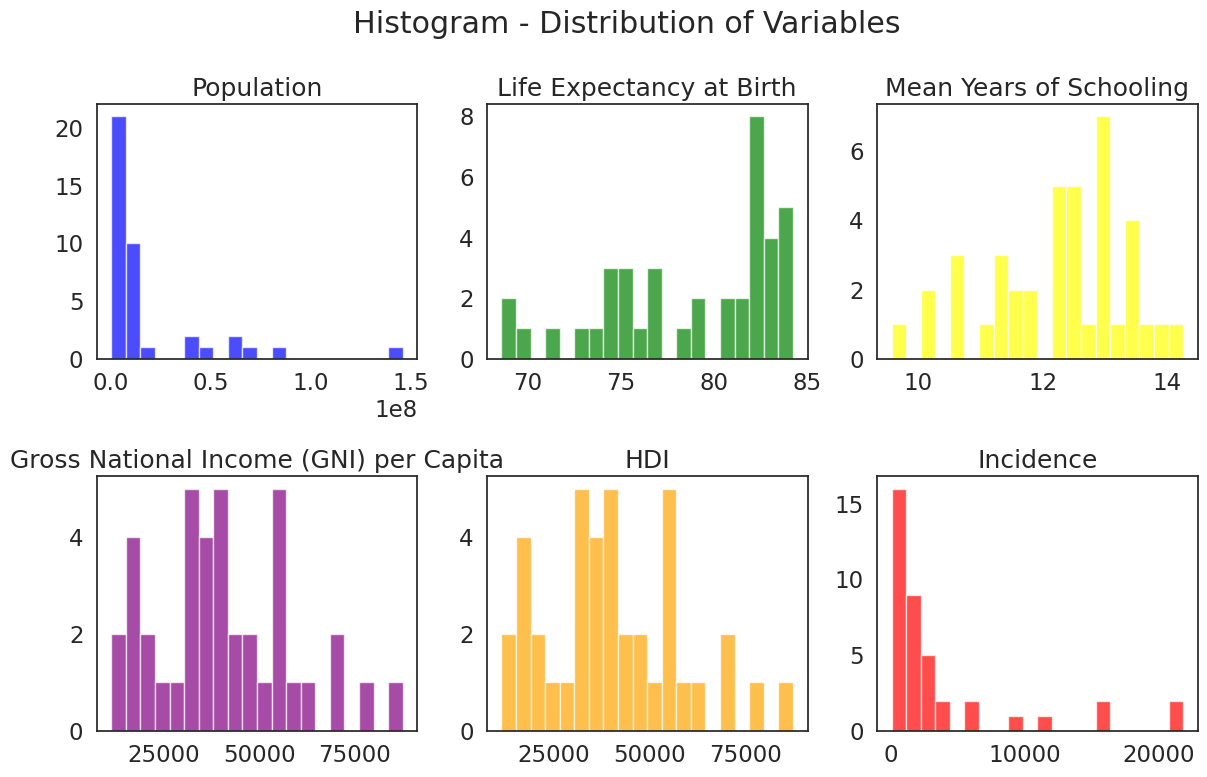

In [ ]:
# Histogram - Distribution of Variables
import matplotlib.pyplot as plt

# Define the figure and axes
fig, axs = plt.subplots(2, 3, figsize=(12, 8))

# Plot histograms for each variable on its own subplot with a different color
axs[0, 0].hist(y1, bins=20, color='blue', alpha=0.7)
axs[0, 0].set_title('Population')

axs[0, 1].hist(y2, bins=20, color='green', alpha=0.7)
axs[0, 1].set_title('Life Expectancy at Birth')

axs[0, 2].hist(y3, bins=20, color='yellow', alpha=0.7)
axs[0, 2].set_title('Mean Years of Schooling')

axs[1, 0].hist(y4, bins=20, color='purple', alpha=0.7)
axs[1, 0].set_title('Gross National Income (GNI) per Capita')

axs[1, 1].hist(y4, bins=20, color='orange', alpha=0.7)
axs[1, 1].set_title('HDI')

axs[1, 2].hist(Y, bins=20, color='red', alpha=0.7)
axs[1, 2].set_title('Incidence')

# Add main title
fig.suptitle('Histogram - Distribution of Variables')
# Adjust layout and display
plt.tight_layout()
plt.show()

In the above two graphs, "Line chart - Variables in countries" and "Histogram - Distribution of Variables", the variables population and incidence have large isolated values. This needs to remove outliers which will has an effect on the effectiveness of the linear regression. Since regression analysis is sensitive to such outliers, we should remove them.

So the following defines a function at the end of this section("4 Presentation of data") that calculates the quartiles and filters out observations with distances from the upper quartile more than three times the distance between the upper quartile and the lower quartile, thus removing outliers.

It can also be seen from the two graphs that "Life Expectancy at Birth", "Mean year of schooling" and "GNI" are relatively evenly distributed.

- **Check each variable**

In [ ]:
df['country'].describe()

count          40
unique         40
top       Albania
freq            1
Name: country, dtype: object

In [ ]:
df['region'].describe()

count         40
unique         1
top       Europe
freq          40
Name: region, dtype: object

In [ ]:
df['continent'].describe()

count                  40
unique                  4
top       Southern Europe
freq                   13
Name: continent, dtype: object

In [ ]:
df['incidence'].describe()

count       40.000000
mean      3663.825000
std       5705.796625
min         56.000000
25%        491.000000
50%       1393.500000
75%       2706.500000
max      21869.000000
Name: incidence, dtype: float64

In [ ]:
df['population'].describe()

count    4.000000e+01
mean     1.831853e+07
std      2.978044e+07
min      3.454000e+05
25%      2.516604e+06
50%      6.339772e+06
75%      1.096966e+07
max      1.458059e+08
Name: population, dtype: float64

In [ ]:
df['hdi'].describe()

count    40.000000
mean      0.882625
std       0.064582
min       0.734000
25%       0.839750
50%       0.897000
75%       0.940500
max       0.967000
Name: hdi, dtype: float64

In [ ]:
df['life_expectancy_at_birth'].describe()

count    40.000000
mean     78.819975
std       4.650503
min      68.564000
25%      75.209250
50%      80.801500
75%      82.486000
max      84.255000
Name: life_expectancy_at_birth, dtype: float64

In [ ]:
df['mean_years_of_schooling'].describe()

count    40.000000
mean     12.249428
std       1.113179
min       9.575940
25%      11.481866
50%      12.425850
75%      12.972167
max      14.255940
Name: mean_years_of_schooling, dtype: float64

In [ ]:
df['gni_per_capita'].describe()

count       40.000000
mean     40566.378218
std      18167.572740
min      11416.216800
25%      30284.212653
50%      39037.951350
75%      53905.123708
max      87467.513910
Name: gni_per_capita, dtype: float64

As we can see from the above results, except for the variables related to the location of the country, which are of object type, the rest of the variables have been changed to numeric types (int and float) to facilitate subsequent calculations.

- **Mapping the presentation of Pancreas incidence on the map**

In order to easy identify the spatial distribution of Pancreas incidence, here plot the distribution of variable 'incidence' on the world map(Europe only).

I used package '[plotly](https://plotly.com/python/choropleth-maps/)' to draw the world map.

The country code file used below is provided [here](https://raw.githubusercontent.com/plotly/datasets/master/2014_world_gdp_with_codes.csv).

In [ ]:
# Use the merge() function to merge the CODE columns from df_mapcode into df
df_mapcode = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2014_world_gdp_with_codes.csv', usecols=['COUNTRY', 'CODE'])
df_mapcode

,COUNTRY,CODE
0,Afghanistan,AFG
1,Albania,ALB
2,Algeria,DZA
3,American Samoa,ASM
4,Andorra,AND
...,...,...
217,Virgin Islands,VGB
218,West Bank,WBG
219,Yemen,YEM
220,Zambia,ZMB


In [ ]:
df_merged = pd.merge(df, df_mapcode, left_on='country', right_on='COUNTRY', how='left')
# Delete 'COUNTRY' column from merged result
df_merged = df_merged.drop(columns=['COUNTRY'])
df_merged

,country,region,continent,incidence,population,hdi,life_expectancy_at_birth,mean_years_of_schooling,gni_per_capita,CODE
0,Albania,Europe,Southern Europe,302,2866378,0.789,76.833,10.121144,15293.32651,ALB
1,Austria,Europe,Western Europe,2159,9066712,0.926,82.412,12.305714,56529.66329,AUT
2,Belarus,Europe,Eastern Europe,1354,9432804,0.801,73.246,12.241224,18425.01061,BLR
3,Belgium,Europe,Western Europe,2338,11668276,0.942,82.293,12.528578,53644.03854,BEL
4,Bosnia and Herzegovina,Europe,Southern Europe,502,3249313,0.779,75.293,10.536320,16571.41275,BIH
5,Bulgaria,Europe,Eastern Europe,1280,6844591,0.799,71.528,11.413180,25920.80375,BGR
6,Croatia,Europe,Southern Europe,801,4059285,0.878,79.236,12.328718,34323.80663,HRV
7,Cyprus,Europe,Southern Europe,215,1223390,0.907,81.889,12.440170,40136.89453,CYP
8,Czechia,Europe,Eastern Europe,2479,10736782,0.895,78.129,12.916053,39944.66682,NaN
9,Denmark,Europe,Northern Europe,1354,5834952,0.952,81.882,12.960490,62018.95694,DNK


In [ ]:
# Create Visual Maps with the Plotly Library
import plotly.graph_objects as go
import pandas as pd

# Map - Incidence of pancreatic cancer in European countries in 2022
fig = go.Figure(data=go.Choropleth(
    locations=df_merged['CODE'],
    z=df_merged['incidence'],
    text=df_merged['country'],
    colorscale='Reds',
    autocolorscale=False,
    reversescale=False,
    marker_line_color='darkgray',
    marker_line_width=0.5,
    colorbar_title='Pancreas<br>incidence',
))

fig.update_layout(
    title_text='Incidence of pancreatic cancer in European countries in 2022',
    title_x=0.5,  # Set title to be horizontally centered
    geo=dict(
        showframe=False,
        projection_type='mercator',  # Use Mercator projection
        center={'lat': 51.1657, 'lon': 10.4515},  # Set the center of the map to be the center of Europe
        # Set the bounding box of the map to be Europe
        lataxis_range=[20, 75],
        lonaxis_range=[-20, 60]
    ),
    annotations=[dict(
        x=0.55,
        y=0.1,
        xref='paper',
        yref='paper',
        text='',
        showarrow=False
    )],
    coloraxis_colorbar=dict(
        tickfont=dict(color='white'),  # Set the color of the tick labels to white
        tickvals=[0, 1],  # Adjust the tick values as needed
        ticktext=['Light', 'Dark']  # Adjust the tick texts as needed
    )
)

fig.show()

As shown in the "Incidence of pancreatic cancer in European countries in 2022" map above, the majority of European countries have an Incidence of pancreatic cancer below 15k. Germany has the highest Incidence of pancreatic cancer (darkest red). Next, France and Italy are also darker in red.

- **Remove outliers**

In [ ]:
def filter_outliers(var):
    q1 = var.quantile(0.25) # calculate the first quartile
    q3 = var.quantile(0.75) # calculate the third quartile
    iqr = q3 - q1 # calculate the interquartile range
    low = q1 - 3*iqr # calculate the lower bound
    high = q3 + 3*iqr # calculate the upper bound
    filtered = df[(var > low) & (var < high)] # filter  the values that are within the bounds
    dropped_observations= len(var)-len(filtered) # calculate the number of observations that were dropped

    print('Dropped {} observations'.format(dropped_observations))
    return  filtered

df=filter_outliers(df['population']) # filter outliers from population

Dropped 8 observations


As the results of the above run show, 8 data were eliminated because they were too far off.

In [ ]:
summary=df.describe().round(2).T
summary[['count','mean','std','min','max']]

,count,mean,std,min,max
incidence,32.0,1239.62,999.96,56.00,3490.00
population,32.0,5657983.72,4374413.24,345400.00,19031330.00
hdi,32.0,0.88,0.06,0.76,0.97
life_expectancy_at_birth,32.0,78.84,4.29,68.62,84.26
mean_years_of_schooling,32.0,12.27,1.07,9.58,13.90
gni_per_capita,32.0,41107.06,19247.31,12963.62,87467.51


<a name="5_Methodology"></a>
# 5 Methodology


Here is the data processing flow of this assessment, mainly using three Regression methods for correlation between Pancreas incidence and other 5 variables.

1. Summary Statistics (finished in Section 4)
    * Data pre-processing
    * Table of Summary Statistics
2. Visualisation (finished in Section 4)
    * Exploratory Plots
3. Assumptions (will be finished in this section)
    * A. Independence
    * B. Heteroscedasticity
    * C. Multicollinearity: VIF + Correlation Matrix
4. Regression (will be finished in this section)
    * OLS regression
    * Ridge regression
    * Regression tree

## 5.1 Assumptions

Before modeling a linear relationship, we need to check a couple things-- all statistical tests have a number of assumptions that must be satisfied in order to yield robust results.

Before we run a regression, we must check that the assumptions below in this case are satisfied.

    A. Independence
    B. Homoscedasticity
    C. Multicollinearity

Let's go through them one by one.

- **Independence**

`Linear regression assumes that each sample subject's measurements are unaffected by and independent of the measurements of other subjects.`

Countries are independent of each other and pancreatic cancer is usually not contagious. The data we analysed for the year 2022 satisfy this independence.

- **Homoscedasticity**

`Linear regression assumes that the variance of residuals is the same for any value of $x$, and that residuals are normally distributed with a mean of 0.`

According to Homoscedasticity, the regression line should be a consistent fit over the entire range of 𝑥 values. That is, it is checked whether the residuals are randomly distributed around 0 (rather than on one side).

Text(69.75, 0.5, 'Incidence')

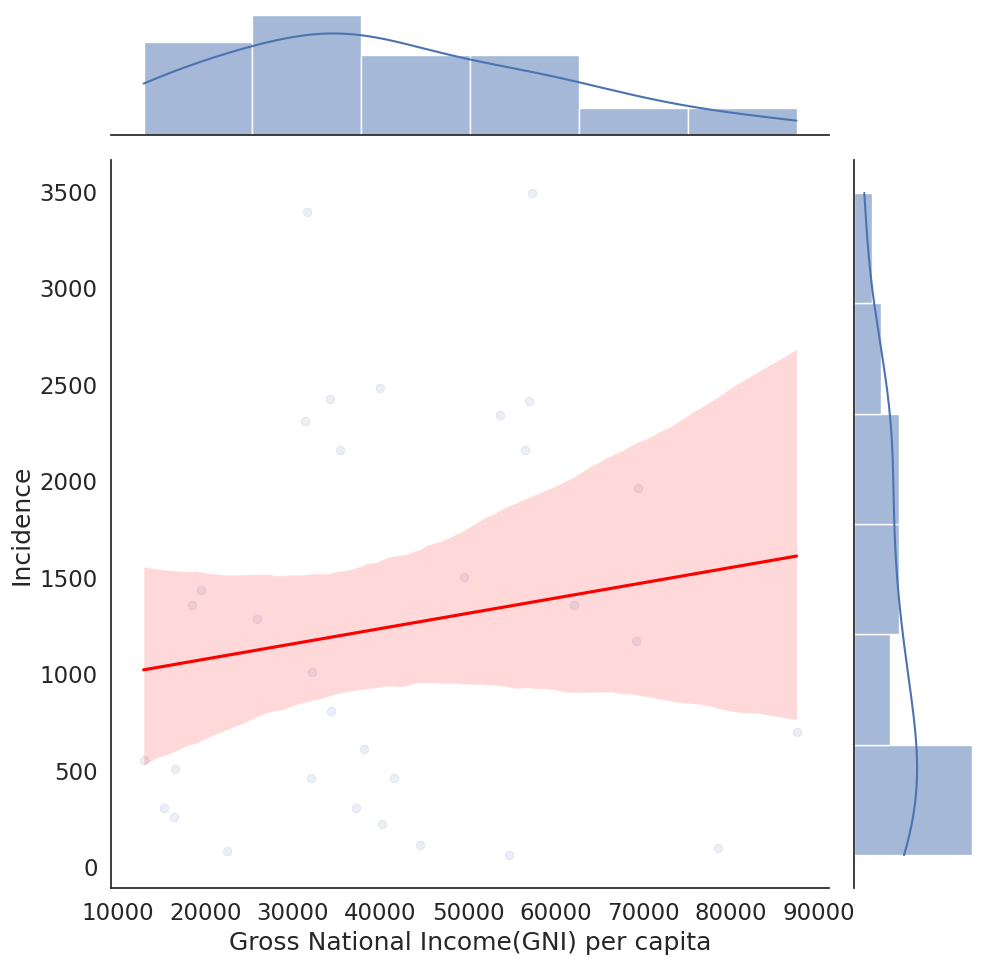

In [ ]:
# plot a scatterplot with a regression line and two histograms
sns.jointplot(data=df,
                x='gni_per_capita', # set the x axis to be the years of schooling
                y='incidence', # set the y axis to be the hourly wage
                kind="reg",  # set the kind of plot to be a regression plot
                scatter_kws=dict(alpha=0.1), # set the transparency of the points to be 0.1 (10%)
                line_kws=dict(color='red'), # set the color of the regression line to red
                height=10) # set the height of the plot to be 10 inches

plt.xlabel('Gross National Income(GNI) per capita') # add a label to the x axis
plt.ylabel('Incidence') # add a label to the y axis

Here we first try sns.jointplot() to create a plot with four parts to help us diagnose potential heteroskedasticity:

- The main plot is a scatter plot between Pancreas incidence on the y-axis and Gross National Income (GNI) per capita on the x-axis.

- Points are evenly and randomly distributed on both sides of the regression line.

- The regression line superimposed on this graph allows us to see the relationship between the model and the underlying data.

- The histograms on the right and top sides of this figure show the distribution of incidence and with the variable skewed in the direction of smaller values.

- The histogram at the top of this figure shows the distribution of Gross National Income (GNI) per capita.

- **Multicollinearity**

`Multicollinearity emerges when two or more independent variables which are highly correlated are included in a model.`

When independent variables are correlated, it indicates that a change in one variable is associated with a change in another variable. The stronger the correlation, the more difficult it is to change one variable without changing the other.

Text(0.5, 1.0, 'Heatmap - Correlation Matrix')

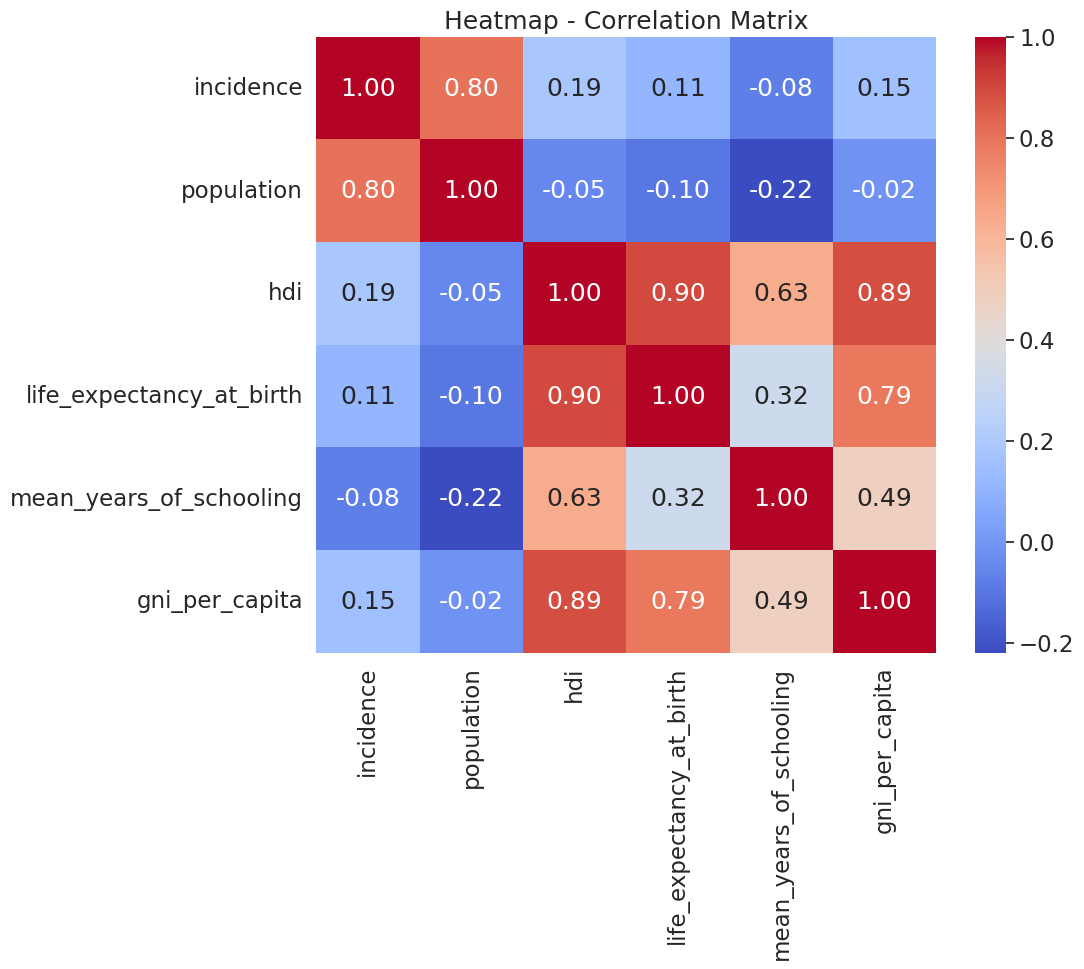

In [ ]:
# Heatmap - Correlation Matrix
sns.heatmap(df.select_dtypes(include=np.number).corr(), # plot a correlation matrix
            annot=True, # show the correlation values on the plot
            fmt=".2f", # set the format of the correlation values to be two decimal places
            cmap='coolwarm') # set the color palette to be coolwarm (blue for negative correlations, red for positive correlations)

plt.title('Heatmap - Correlation Matrix') # add a title

This heatmap presents the results of the correlation matrix calculations.

In the graph we can see a set of values presented as "0.80" which means that population and incidence are highly correlated with each other, however, this is not a problem of multicollinearity since incidence will be our dependent variable.

The highest correlation coefficient is 0.90, which means that "life_expectancy_at_birth" is highly correlated with "hdi" are highly correlated.

We can notice that the values in the cells related to hdi are larger, and we expect to kick it out later.

- **Calculate VIF**


From the perspective of factor diversification, we want to choose to retain "life_expectancy_at_birth
" and drop "hdi" here because the results of heatmap. But let's make a decision after we calculate the VIF.

**VIF (Variance Inflation Factor)** is a statistical indicator used to detect multicollinearity between independent variables. Typically, the larger the VIF value, the higher the correlation between the independent variable and other independent variables.

The formula for calculating VIF is as follows:


$$\large VIF_j=\frac{1}{1-R_{j}^{2}}$$

$R_{j}^{2}$: For each independent variable, treat it as the dependent variable and then run a linear regression on the other independent variables.
Calculate the coefficient of determination ($R^{2}$) of this linear regression model.

$VIF_{j}$: Obtained by subtracting 1 from the reciprocal of the coefficient of determination

In [ ]:
# Define  VIF calculation function
# This function is amended from: https://stackoverflow.com/a/51329496/4667568

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

def drop_column_using_vif_(df, list_var_not_to_remove=None, thresh=5):
    '''
    Calculates VIF each feature in a pandas dataframe, and repeatedly drop the columns with the highest VIF
    A constant must be added to variance_inflation_factor or the results will be incorrect

    :param df: the pandas dataframe containing only the predictor features, not the response variable
    :param list_var_not_to_remove: the list of variables that should not be removed even though it has a high VIF. For example, dummy (or indicator) variables represent a categorical variable with three or more categories.
    :param thresh: the max VIF value before the feature is removed from the dataframe
    :return: dataframe with multicollinear features removed
    '''
    while True:
        # adding a constatnt item to the data
        df_with_const = add_constant(df)

        vif_df = pd.Series([variance_inflation_factor(df_with_const.values, i)
               for i in range(df_with_const.shape[1])], name= "VIF",
              index=df_with_const.columns).to_frame()

        # drop the const as const should not be removed
        vif_df = vif_df.drop('const')

        # drop the variables that should not be removed
        if list_var_not_to_remove is not None:
            vif_df = vif_df.drop(list_var_not_to_remove)

        print('Max VIF:', vif_df.VIF.max())

        # if the largest VIF is above the thresh, remove a variable with the largest VIF
        if vif_df.VIF.max() > thresh:
            # If there are multiple variables with the maximum VIF, choose the first one
            index_to_drop = vif_df.index[vif_df.VIF == vif_df.VIF.max()].tolist()[0]
            print('Dropping: {}'.format(index_to_drop))
            df = df.drop(columns = index_to_drop)
        else:
            # No VIF is above threshold. Exit the loop
            break

    return df

In [ ]:
ind_vars=['population', 'hdi','life_expectancy_at_birth','mean_years_of_schooling', 'gni_per_capita']

vif = drop_column_using_vif_(df[ind_vars], thresh=5)
print("The columns remaining after VIF selection are:")
print(vif.columns)

Max VIF: 33.12648978199661
Dropping: hdi
Max VIF: 3.308288751063885
The columns remaining after VIF selection are:
Index(['population', 'life_expectancy_at_birth', 'mean_years_of_schooling',
       'gni_per_capita'],
      dtype='object')


As can be seen from the VIF calculations, Max VIF = 33.12648978199661, which is not between 1 and 10, is not considered acceptable. The drop factor is 'hdi'.

In [ ]:
ind_vars=['population', 'life_expectancy_at_birth','mean_years_of_schooling', 'gni_per_capita']

vif = drop_column_using_vif_(df[ind_vars], thresh=5)
print("The columns remaining after VIF selection are:")
print(vif.columns)

Max VIF: 3.308288751063885
The columns remaining after VIF selection are:
Index(['population', 'life_expectancy_at_birth', 'mean_years_of_schooling',
       'gni_per_capita'],
      dtype='object')



After dropping 'hdi', VIF value of 3.308288751063885 may indicate some degree of correlation between some of the independent variables, but not severe multicollinearity. Therefore, we can continue to use these 4 independent variables('population', 'life_expectancy_at_birth', 'mean_years_of_schooling',
       'gni_per_capita') when constructing our model and monitor model performance to ensure the accuracy of results.

## 5.2 Regression

In this part we will use 3 regression models and compare their performance and select the fit with better performance.

- **Ordinary Least Squares (OLS)**

We first chose Ordinary Least Squares (OLS) for linear regression because our dataset is small.

OLS fits a linear model by minimising the sum of squared residuals. The goal is to find a set of coefficients that minimise the sum of squares of the residuals between the values predicted by the model and the observed values.
The formula is given below:
$$\large minimize\sum_{i=1}^{n} (y_i - \beta_0 - \sum_{j=1}^{p} \beta_j x_{ij})^2$$


Where $y_i$ is the observed value of the dependent variable, the
$𝛽_0$, $𝛽_1$,..., $𝛽_p$ are the coefficients of the model, and
$𝑥_𝑖𝑗$ is the observed value of the independent variable, and
$𝑝$ is the number of independent variables, and
$𝑛$ is the number of samples.

In [ ]:
from statsmodels.formula.api import ols
from statsmodels.iolib.summary2 import summary_col

model_ols_1= ols('incidence ~ population + life_expectancy_at_birth + mean_years_of_schooling + gni_per_capita', data=df).fit() # fit the model
summary = model_ols_1.summary()
summary_text = str(summary)
summary_text = summary_text.split('\n\nNotes:\n')[0]
print(summary_text)

                            OLS Regression Results                            
Dep. Variable:              incidence   R-squared:                       0.680
Model:                            OLS   Adj. R-squared:                  0.632
Method:                 Least Squares   F-statistic:                     14.33
Date:                Mon, 22 Apr 2024   Prob (F-statistic):           2.14e-06
Time:                        08:24:43   Log-Likelihood:                -247.72
No. Observations:                  32   AIC:                             505.4
Df Residuals:                      27   BIC:                             512.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

In [ ]:
R_squared_ols1 = 0.680

$R_{OLS_1}^2$ = 0.680: This indicates that the model explains about 68.0% of the variance in the dependent variable (incidence).

The F-statistic of the model is 14.33, which corresponds to a p-value of 2.14e-06, indicating that the model is significant overall.

Among the independent variables, population has a coefficient of 0.0002, which is a significant positive correlation, i.e., an increase in population is positively correlated with an increase in incidence.

However, the coefficients of life_expectancy_at_birth and mean_years_of_schooling are 40.0572 and 42.6850 respectively, but the p-values of both are greater than 0.05, indicating that their effects on incidence are not statistically significant.

The coefficient of Gross National Income (gni_per_capita) is 0.0005, but the p-value is as high as 0.963, indicating that there is no significant effect of GNI on incidence.

In [ ]:
from statsmodels.formula.api import ols
from statsmodels.iolib.summary2 import summary_col

model_ols_2= ols('incidence ~ population + mean_years_of_schooling + gni_per_capita', data=df).fit() # fit the model
summary = model_ols_2.summary()
summary_text = str(summary)
summary_text = summary_text.split('\n\nNotes:\n')[0]
print(summary_text)

                            OLS Regression Results                            
Dep. Variable:              incidence   R-squared:                       0.669
Model:                            OLS   Adj. R-squared:                  0.634
Method:                 Least Squares   F-statistic:                     18.88
Date:                Mon, 22 Apr 2024   Prob (F-statistic):           6.77e-07
Time:                        08:24:43   Log-Likelihood:                -248.24
No. Observations:                  32   AIC:                             504.5
Df Residuals:                      28   BIC:                             510.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                -

In [ ]:
R_squared_ols2 = 0.669

Adjusting the model by removing each factor, it was found that after removing "life_expectancy_at_birth", $𝑅_{𝑂𝐿𝑆2}^2$ = 0.669, and the overall performance of the system was better. overall performance is better, but the p-values of the variables are still large (i.e., the correlation is very low). So the model was switched for regression to explore the effects of the factors on Pancreas incidence in European countries from multiple perspectives.

We chose to use regularisation methods: Regularisation methods such as Ridge Regression can help to reduce the effects of multicollinearity and improve model stability and generalisation.

- **Ridge Regression**

Ridge Regression is an extension of linear regression for dealing with data with multicollinearity. It introduces a regularisation term based on ordinary least squares to limit the size of the model parameters and thus reduce the variance of the model. The optimisation objective function for ridge regression is shown below:

$$\large min_{β} { (1/2{n}) || y - X_β ||^2_2 + α || β ||^2_2 }$$

where $y$ is the vector of observed target values, $X$ is the identity matrix, $β$ is the vector of regression coefficients, $n$ is the number of samples, $||^2_2$ denotes the L2 paradigm (Euclidean paradigm), and $α$ is the regularisation parameter, which is used to control the degree of penalty in the regularisation term.

Ridge regression finds the best regression coefficients by minimising the objective function. The regularisation term forces each element of the coefficient vector to be as small as possible, thus reducing the complexity of the model. Ridge regression has good stability to covariance problems, reduces the effect of noise in the data and improves the generalisation of the model.

Here begin by varying the scale of the test set to see the overall performance of the model at different scales.

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Assuming X is the feature matrix and y is the target vector
X = df[['population','life_expectancy_at_birth', 'mean_years_of_schooling', 'gni_per_capita']]
y = df['incidence']

# List to store results
results = []

# Trying different test set proportions
test_sizes = np.arange(0.1, 0.95, 0.05)
for test_size in test_sizes:
    # Splitting the dataset into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

    # Creating a Ridge regression model, where alpha is the regularization parameter
    ridge_model = Ridge(alpha=1.0)

    # Fitting the Ridge regression model
    ridge_model.fit(X_train, y_train)

    # Predicting on the test set
    y_pred = ridge_model.predict(X_test)

    # Calculating the Mean Squared Error (MSE)
    mse = mean_squared_error(y_test, y_pred)

    # Calculating R-squared
    R_squared = ridge_model.score(X_test, y_test)

    # Storing the results in a list
    results.append({'test_size': test_size, 'R_squared': R_squared, 'MSE': mse})

# Converting the results to a DataFrame
results_df = pd.DataFrame(results)

# Printing the results
print(results_df)

    test_size  R_squared           MSE
0        0.10   0.527431  3.205166e+05
1        0.15   0.563514  3.082882e+05
2        0.20   0.514548  2.575778e+05
3        0.25   0.681190  2.292543e+05
4        0.30   0.760209  2.122701e+05
5        0.35   0.800583  1.930534e+05
6        0.40   0.798346  1.812547e+05
7        0.45   0.772364  1.885903e+05
8        0.50   0.731477  2.042378e+05
9        0.55   0.739001  1.882889e+05
10       0.60  -0.702258  1.154139e+06
11       0.65  -1.625255  1.976419e+06
12       0.70  -4.878331  4.499366e+06
13       0.75   0.502169  4.693584e+05
14       0.80   0.501055  4.685933e+05
15       0.85   0.561859  4.234891e+05
16       0.90   0.460941  5.338610e+05


As can be seen from the content display of results_df, R_squared overall improves with increasing test_size until test_size<0.35 (with a slight drop-off at test_size=2). It peaks at test_size=0.35. Then R_squared decreases again after test_size>0.35.

So test_size=0.35 was chosen for the following run analysis.

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Assume X is the feature matrix and y is the target vector
X = df[['population','life_expectancy_at_birth', 'mean_years_of_schooling', 'gni_per_capita']]
y = df['incidence']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=42)

# Create a Ridge regression model, where alpha is the regularization parameter
ridge_model = Ridge(alpha=1.0)

# Fit the Ridge regression model
ridge_model.fit(X_train, y_train)

# Predict on the testing set
y_pred = ridge_model.predict(X_test)

# Calculate the Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Calculate R-squared
R_squared = ridge_model.score(X_test, y_test)
print("R-squared:", R_squared)

# Output the coefficients of the model
print("Ridge Regression Coefficients:", ridge_model.coef_)

Mean Squared Error: 193053.41309728668
R-squared: 0.8005830407866561
Ridge Regression Coefficients: [ 1.77596440e-04  9.43522697e+00 -1.29934776e+02  1.54993310e-02]


In [ ]:
R_squared_rid = 0.801;

These results suggest that the model explains approximately 80.06% of the variance in the incidence variable. Although the R-squard values are good, there may be overfitting because of the small proportion of the test set.

Ridge Regression computed an array of pre-parameters for each variable as [ 1.77596440e-04 9.43522697e+00 -1.29934776e+02 1.54993310e-02].

- **Regression tree**

In this part, we will use Regression Tree continuing to explore research questions. We'll split our dataset into two parts: one containing attribute data and the other containing classification data. Then we'll feed these datasets into the classifier to identify the classification patterns.

In [ ]:
df

,country,region,continent,incidence,population,hdi,life_expectancy_at_birth,mean_years_of_schooling,gni_per_capita
0,Albania,Europe,Southern Europe,302,2866378,0.789,76.833,10.121144,15293.32651
1,Austria,Europe,Western Europe,2159,9066712,0.926,82.412,12.305714,56529.66329
2,Belarus,Europe,Eastern Europe,1354,9432804,0.801,73.246,12.241224,18425.01061
3,Belgium,Europe,Western Europe,2338,11668276,0.942,82.293,12.528578,53644.03854
4,Bosnia and Herzegovina,Europe,Southern Europe,502,3249313,0.779,75.293,10.536320,16571.41275
5,Bulgaria,Europe,Eastern Europe,1280,6844591,0.799,71.528,11.413180,25920.80375
6,Croatia,Europe,Southern Europe,801,4059285,0.878,79.236,12.328718,34323.80663
7,Cyprus,Europe,Southern Europe,215,1223390,0.907,81.889,12.440170,40136.89453
8,Czechia,Europe,Eastern Europe,2479,10736782,0.895,78.129,12.916053,39944.66682
9,Denmark,Europe,Northern Europe,1354,5834952,0.952,81.882,12.960490,62018.95694


- **Initialize model**

In [ ]:
# Independent variable - incidence
resp_target_data = df['incidence']
# Dependent variables
predic_indep_data = df.drop(columns=['incidence', 'country', 'region', 'continent'])

In [ ]:
from sklearn.tree import DecisionTreeRegressor
reg_tree = DecisionTreeRegressor(random_state=0)
reg_tree.fit(predic_indep_data, resp_target_data)

DecisionTreeRegressor(random_state=0)

A decision tree regression model was created using DecisionTreeRegressor and the model was fitted (trained) to the given predictive data (predic_indep_data) and response data (resp_target_data) using the fit method.

In [ ]:
# Input feature data:X, corresponding target data:y
reg_tree.score(X=predic_indep_data, y=resp_target_data)

1.0

$R_{tree}^2$ = 1.0

Good fitting so far but clearly overfitting!

In the next step let's convert some bool type data to be used for classification training.

In [ ]:
# Calculate the mean of the incidence column
average_incidence = df['incidence'].mean()

# Create a new column 'beyond_average' and set True or False based on condition
df['beyond_average'] = df['incidence'] > average_incidence

# Convert True and False to boolean values True and False
df['beyond_average'] = df['beyond_average'].astype(bool)

# Display the results
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32 entries, 0 to 37
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   32 non-null     object 
 1   region                    32 non-null     object 
 2   continent                 32 non-null     object 
 3   incidence                 32 non-null     int64  
 4   population                32 non-null     int64  
 5   hdi                       32 non-null     float64
 6   life_expectancy_at_birth  32 non-null     float64
 7   mean_years_of_schooling   32 non-null     float64
 8   gni_per_capita            32 non-null     float64
 9   beyond_average            32 non-null     bool   
dtypes: bool(1), float64(4), int64(2), object(3)
memory usage: 2.5+ KB


<ipython-input-51-5cbfe3fe548b>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-51-5cbfe3fe548b>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df

,country,region,continent,incidence,population,hdi,life_expectancy_at_birth,mean_years_of_schooling,gni_per_capita,beyond_average
0,Albania,Europe,Southern Europe,302,2866378,0.789,76.833,10.121144,15293.32651,False
1,Austria,Europe,Western Europe,2159,9066712,0.926,82.412,12.305714,56529.66329,True
2,Belarus,Europe,Eastern Europe,1354,9432804,0.801,73.246,12.241224,18425.01061,True
3,Belgium,Europe,Western Europe,2338,11668276,0.942,82.293,12.528578,53644.03854,True
4,Bosnia and Herzegovina,Europe,Southern Europe,502,3249313,0.779,75.293,10.536320,16571.41275,False
5,Bulgaria,Europe,Eastern Europe,1280,6844591,0.799,71.528,11.413180,25920.80375,True
6,Croatia,Europe,Southern Europe,801,4059285,0.878,79.236,12.328718,34323.80663,False
7,Cyprus,Europe,Southern Europe,215,1223390,0.907,81.889,12.440170,40136.89453,False
8,Czechia,Europe,Eastern Europe,2479,10736782,0.895,78.129,12.916053,39944.66682,True
9,Denmark,Europe,Northern Europe,1354,5834952,0.952,81.882,12.960490,62018.95694,True


In [ ]:
from sklearn.preprocessing import LabelEncoder
# Seperate data
target = df['beyond_average']
source = df.drop(columns=['incidence', 'country', 'region', 'continent', 'beyond_average'])

# Create an instance of LabelEncoder and assign the label to the variable le.
le = LabelEncoder()
le.fit([True,False])
labels_fea = le.transform(df['beyond_average'])
pd.Series(labels_fea).value_counts()

0    17
1    15
Name: count, dtype: int64

- **Convert the independent dataset to a dictionary array**

The parameter 'record' specifies the format of the dictionary key. When 'record' is specified, it means that each row of the DataFrame will be converted to a dictionary, where the key of the dictionary is the column label and the value is the data in the corresponding row.

In [ ]:
from sklearn.feature_extraction import DictVectorizer
source_dict = source.to_dict('records')
print(source_dict[1])

{'population': 9066712, 'hdi': 0.926, 'life_expectancy_at_birth': 82.412, 'mean_years_of_schooling': 12.30571367, 'gni_per_capita': 56529.66329}


In [ ]:
v = DictVectorizer()
source_match = v.fit_transform(source_dict)

v.feature_names_[:5]

['gni_per_capita',
 'hdi',
 'life_expectancy_at_birth',
 'mean_years_of_schooling',
 'population']

In [ ]:
v.vocabulary_

{'population': 4,
 'hdi': 1,
 'life_expectancy_at_birth': 2,
 'mean_years_of_schooling': 3,
 'gni_per_capita': 0}

In [ ]:
np.shape(source_match)

(32, 5)

In [ ]:
type(source_match)

scipy.sparse._csr.csr_matrix

In [ ]:
source_array = source_match.toarray()
type(source_array)

numpy.ndarray

- **Start training**

Now that we've processed the data, we can divide the training and test sets according to the common 8:2.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics


train_d, test_d, train_lab, test_lab = train_test_split(source_array, labels_fea)
clf_decision_tree = DecisionTreeClassifier()
clf_decision_tree.fit(train_d, train_lab)
test_pred_decision_tree = clf_decision_tree.predict(test_d)

In [ ]:
# Calculate classification report
from sklearn.metrics import classification_report
report = classification_report(test_lab, test_pred_decision_tree)
type(report)

str

In [ ]:
# Show classification report
print(report)

              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       1.00      0.67      0.80         3

    accuracy                           0.88         8
   macro avg       0.92      0.83      0.85         8
weighted avg       0.90      0.88      0.87         8



Taken together, the model performs well on label 0, but has slightly lower recall on label 1, resulting in a lower F1 value. Overall, the model has an accuracy of 88% and achieves good results in the combined evaluation.

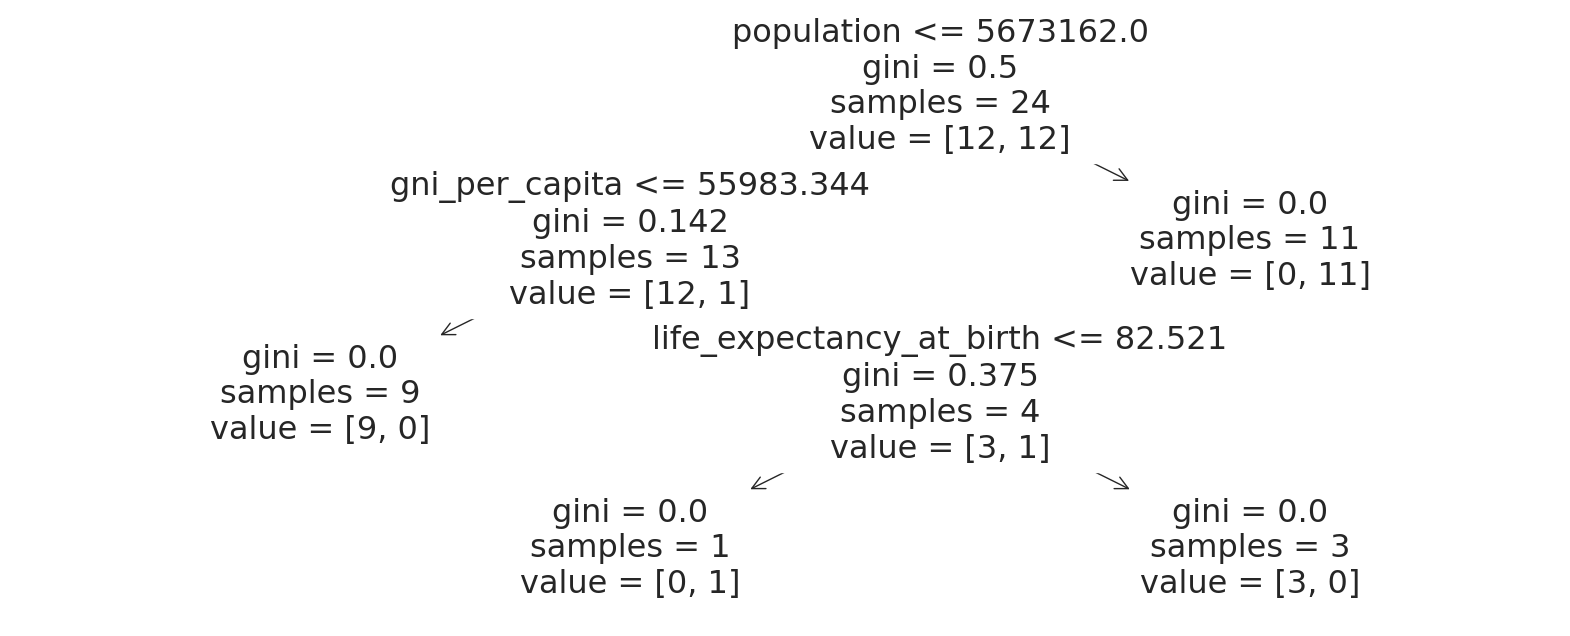

In [ ]:
# Generate tree structure
from sklearn import tree

# Try depth as 5 first(because hava 5 variables)
tree_depth_5 = DecisionTreeClassifier(max_depth=5)
tree_depth_5.fit(train_d, train_lab)
plt.figure(figsize=(20,8))

_ = tree.plot_tree(tree_depth_5, feature_names = v.feature_names_)
plt.show()

We can see by the image above that the leaf node is only 4 deep at the deepest. so we adjust the parameters to show the tree structure again.

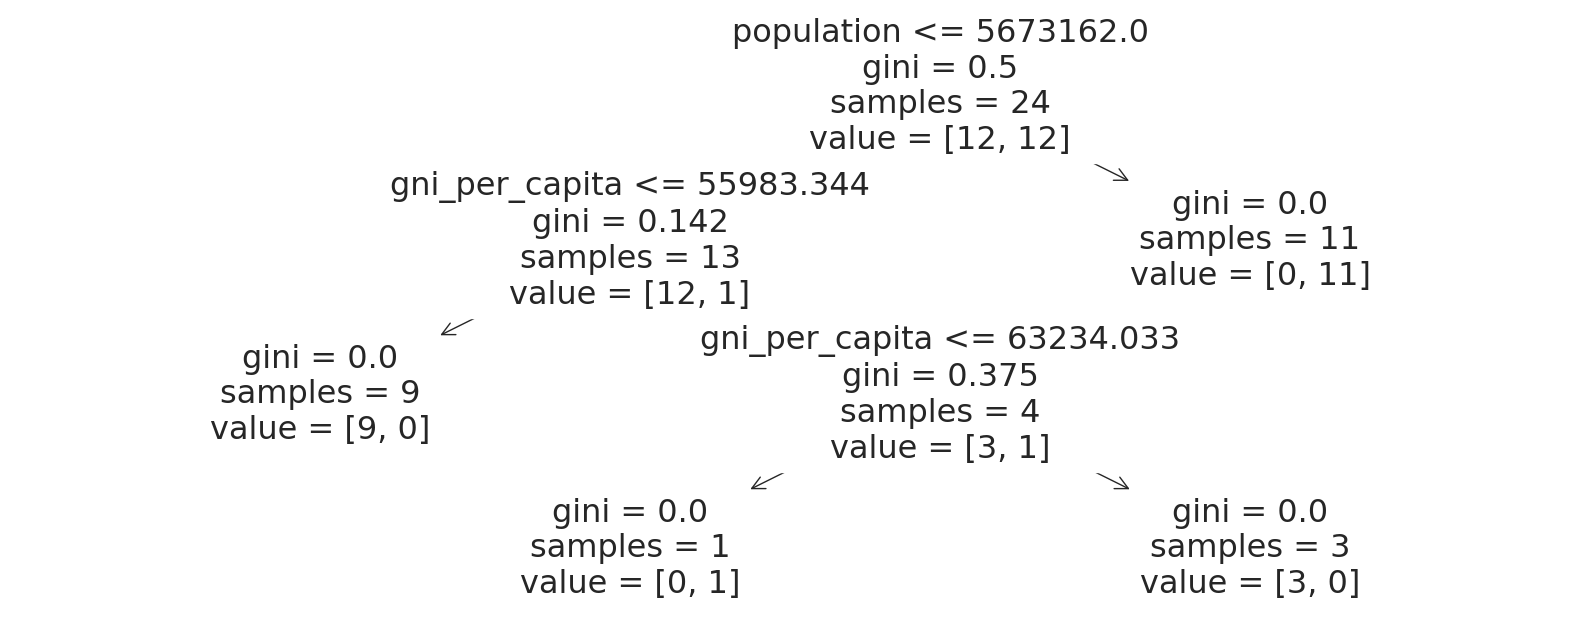

In [ ]:
# Set depth as 4
tree_depth_4 = DecisionTreeClassifier(max_depth=4)
tree_depth_4.fit(train_d, train_lab)
plt.figure(figsize=(20,8))

_ = tree.plot_tree(tree_depth_4, feature_names = v.feature_names_)
plt.show()

<a name="6_Results"></a>
# 6 Results


The three regression methods used in this assessment (OLS, Ridge, Regression tree) all performed well, with $R^2$ of 0.68 and 0.801, and 88% accuracy.
But of the five variables, only population and pancreas incidence are correlated.

Through the results of the previous two models, Pancreas incidence is correlated with population, and its specific correlation coefficient is in the order of $10^{-4}$, with a value of 1.77596440e-04, which is positively correlated. Whereas, the results of the OLS model analysis show that the p-value of 'life expectancy at birth', 'mean years of schooling' and 'gni per capita' is greater than 0.1, and these three social statistics are not correlated with pancreas incidence. Also after orthogonalisation through the Ridge model, the coefficients in the results indicate that the coefficient for 'mean years of schooling' is negative and its growth is in the opposite direction to the growth of Pancreas incidence. The remaining two socio-statistical variables grow in the same direction as Pancreas incidence.

Additionally, the coefficients indicate the strength and direction of the relationship between each predictor variable and the target variable. For example, an increase in life expectancy at birth by one unit is associated with an increase of approximately 9.44 units in the incidence, while an increase in mean years of schooling by one unit is associated with a decrease of approximately 129.93 units in the incidence. Similarly, an increase in GNI per capita by one unit is associated with an increase of approximately 0.0155 units in the incidence.

<a name="7_Discussion_and_limitations"></a>
# 7 Discussion and limitations

Although this assessment covers all assumptions as far as possible in terms of regression methods and processes, modifying the model to improve performance, there are still two limitations.

Limitations of datasets. Because the study area is focused on 40 countries in Europe, the data volume is smaller after excluding outliers. This limitation will affect the regression fitting effect. Also because the GLOBOCAN database's public data storage format is more reporting oriented, it is not easy to get directly from a csv file. While it is possible to overlay years of data, forward calculations involve COVID-19 and have more complex implications to consider.

The influence of multicollinearity still needs to be reduced. Although the influence has been reduced by regularization regression model in this paper, and the VIF value is also near 3, the influence of multicollinearity is still not eliminated. Subsequently, more factors can be expanded to find more factors with high correlation.

In addition, the research field of social factors affecting cancer is also extensible. This assessment focuses on aspects of human development and average life expectancy that are of concern to WHO. Other aspects need to be further introduced.

<a name="8_Conclusion"></a>
# 8 Conclusion


This assessment successfully analyses the correlation between Pancreas incidence and 5 macro-statistical social variables such as life expectancy. OLS and Ridge regression models and regression tree are used to practice and expand this research area. The analysis results show that among the selected variables, only population is significantly associated with Pancreas incidence.

<a name="References"></a>
# References


Are, C., Chowdhury, S., Ahmad, H., Ravipati, A., Song, T., Shrikandhe, S. and Smith, L., 2016. Predictive global trends in the incidence and mortality of pancreatic cancer based on geographic location, socio‐economic status, and demographic shift. Journal of surgical oncology, 114(6), pp.736-742.

Kroman, N., Tutt, A., Jensen, M.B., Wohlfahrt, J., Mouridsen, H.T., Andersen, P.K., Melbye, M. and Ross, G., 2000. Factors influencing the effect of age on prognosis in breast cancer: population based studyCommentary: much still to learn about relations between tumour biology, prognosis, and treatment outcome in early breast cancer. Bmj, 320(7233), pp.474-479.

Sung, H., Ferlay, J., Siegel, R.L., Laversanne, M., Soerjomataram, I., Jemal, A. and Bray, F., 2021. Global cancer statistics 2020: GLOBOCAN estimates of incidence and mortality worldwide for 36 cancers in 185 countries. CA: a cancer journal for clinicians, 71(3), pp.209-249.

Vacek, P.M., Winstead-Fry, P., Secker-Walker, R.H., Hooper, G.J. and Plante, D.A., 2003. Factors influencing quality of life in breast cancer survivors. Quality of Life Research, 12, pp.527-537.

WHO.gco.iarc.fr (2023) Cancer Today. Available at: https://gco.iarc.fr/today/en/data-sources-methods#prevalence (Accessed: 29 March 2024).